# Computes the UT Austin grade distribution data through the 2010s to the early 2020s

## Created by: [Ian Chen](https://github.com/IanC04)

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib inline

## Data Collection
The data was collected from the [UT Austin Analytics](https://iq-analytics.austin.utexas.edu/views/Gradedistributiondashboard/Externaldashboard-Crosstab?%3Aembed=y) website, which 
provides grade distribution data for each semester.
The data was collected from the Fall 2010 semester to the Spring 2023 semester.
The data was then stored in a CSV file for easy access and manipulation.

In [108]:
# Read in the data
import os
from pathlib import Path

# Order of grades
ordering = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'Other']
mapping = {grade: i for i, grade in enumerate(ordering)}

data = dict()
for f in os.listdir('Grades'):
    year = Path(f).stem
    df = pd.read_csv(f'Grades/{f}', skipinitialspace=True)
    df['Year'] = year
    data[year] = df
del f, year, df

data = pd.concat(data.values(), ignore_index=True)

## Data Cleaning
Look for anomalies and +/- differences

In [109]:
# Grab relevant columns
by_year = data.groupby(['Year', 'Letter Grade'])['Count of letter grade'].sum()
by_dept = data.groupby(['Department/Program', 'Letter Grade'])['Count of letter grade'].sum()

## Data Analysis
Use GIFs to visualize the grade distribution over time

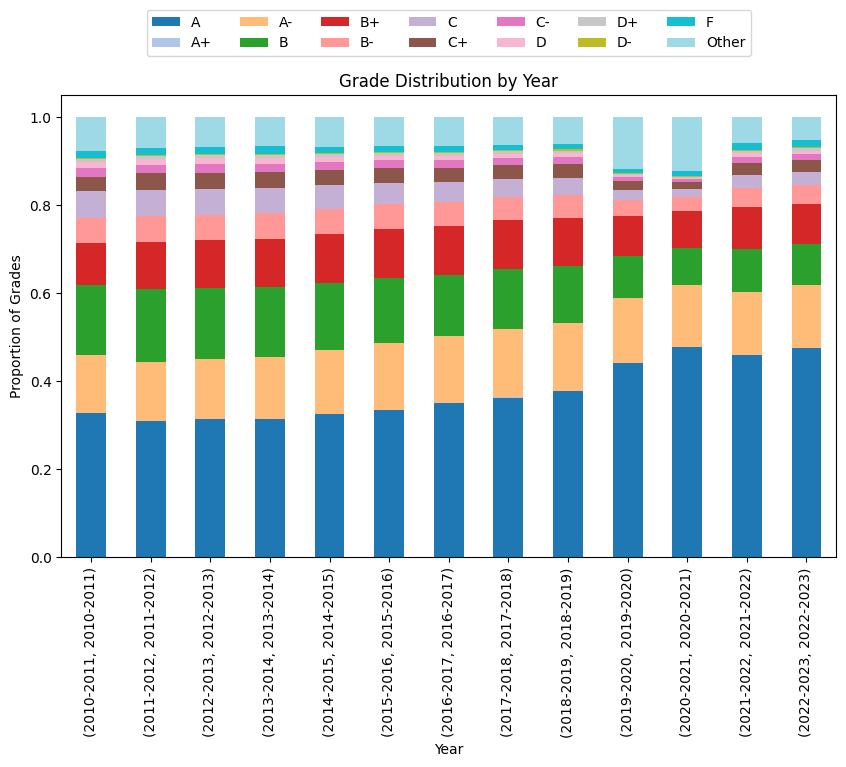

In [110]:
by_year_prop = by_year.groupby('Year').apply(lambda x: x / x.sum())
by_year_prop.unstack().plot(kind='bar', stacked=True, figsize=(10, 6),
                            colormap='tab20', title='Grade Distribution by Year')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=7)
plt.ylabel('Proportion of Grades')
plt.xlabel('Year')
plt.title('Grade Distribution by Year')
plt.show()

## Data Visualization
Now, we can visualize the grade distribution over time using a GIF.

C:\Users\Ian\AppData\Local\Temp;\ipykernel_17536\4132371022.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataframes = data.groupby('Year').apply(
MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x000001F54A8567A0> (for post_execute), with arguments args (),kwargs {}:


KeyError: 0

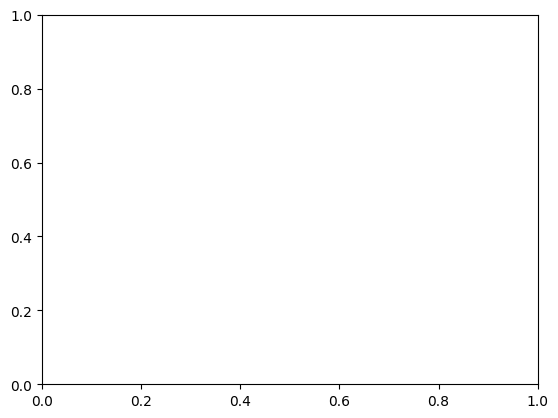

In [111]:
# Function to update the plot for each frame
# TODO Fix
dataframes = data.groupby('Year').apply(
    lambda x: x['Letter Grade'].value_counts(normalize=True)).unstack().fillna(0)


def update(frame):
    plt.cla()
    df = dataframes[frame]
    plt.bar(df['Grades'], df['Proportion'])
    plt.title(f'Year {frame + 1}')
    plt.xlabel('Grades')
    plt.ylabel('Proportion')


# Create the figure and axis
fig, ax = plt.subplots()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(dataframes), interval=1000, repeat=False)

# Save the animation as a GIF
ani.save('Visualizations/grades_animation.gif', writer='imagemagick')

plt.show()